In [1946]:
import numpy as np
import random
from scipy.optimize import minimize
import matplotlib.pyplot as plt

### Generating data

In [1947]:
np.random.seed(100)
classA = np.concatenate((
    np.random.randn(10, 2) * 0.3 + [1.5, 0],
    np.random.randn(10, 2) * 0.3 + [-1.5, 0],
 ))
classB = np.random.randn(20, 2) * 0.3 + [0.0, -0.5]

inputs = np.concatenate((classA, classB))
targets = np.concatenate((
    np.ones(classA.shape[0]),
    -np.ones(classB.shape[0])
))
N = inputs.shape[0]
permute = list(range(N))
# return a shuffled list
random.shuffle(permute)
inputs = inputs[permute, :]
targets = targets[permute]

### Kernel function

In [1948]:
def linear_kernel(x1, x2):
	return np.dot(x1, x2)
    
def polynomial_kernel(x1, x2, p = 6):
	return np.power((np.dot(x1, x2) + 1), p)

def RBF_kernel(x1, x2, sigma = 5):
	diff = np.subtract(x1, x2)
	return np.exp(- np.dot(diff, diff) / (2 * (sigma ** 2)))

In [1949]:
kernel = RBF_kernel
p_matrix = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        p_matrix[i][j] = targets[i] * targets[j] * kernel(inputs[i], inputs[j])
    
def zerofun(alpha):
    return np.dot(alpha, targets)

def objective(alpha):
    return 0.5 * np.dot(alpha, np.dot(alpha, p_matrix)) - np.sum(alpha)

In [1954]:
start = np.zeros(N) # N is the number of training samples
C = 10000

B = [(0, C) for b in range(N)]

XC = {'type':'eq', 'fun':zerofun}

ret = minimize(objective, start, bounds=B, constraints=XC)
if(not ret['success']):
    raise ValueError("Can't find a soluition")
alpha = ret['x']
nonzeros = [(alpha[i], inputs[i], targets[i]) for i in range(N) if np.abs(alpha[i] > 10e-5)]
print(nonzeros)
# Threshold value b
sum = 0
for support_vec in nonzeros:
    sum += support_vec[0] * support_vec[2] * kernel(nonzeros[0][1],support_vec[1])
b = sum - nonzeros[0][2]

def indicator(x, y):
    temp = 0
    for support_vec in nonzeros:
        temp += support_vec[0] * support_vec[2] * kernel([x,y], support_vec[1])
    return temp - b

[(1026.0972649683004, array([-1.14311332, -0.50718505]), 1.0), (293.82707680464864, array([-1.0143055 ,  0.46248155]), 1.0), (33.1937992436854, array([ 0.61038227, -0.66521432]), -1.0), (660.1051835816884, array([-0.55235649, -0.39017203]), -1.0), (549.3488127751313, array([0.97507036, 0.10280412]), 1.0), (1175.9741717231748, array([-0.48407355, -0.05878584]), -1.0)]


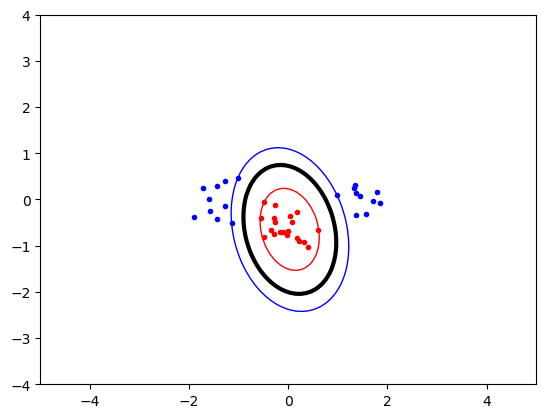

In [1955]:
plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.' )
plt.plot([p[0] for p in classB], [p[1] for p in classB], 'r.' )

xgrid = np.linspace(-5, 5, 100)
ygrid = np.linspace(-4, 4, 100)

grid = np.array([[indicator(x, y) for x in xgrid] for y in ygrid])
plt.contour(xgrid, ygrid, grid, (-1.0, 0.0, 1.0), colors=('red','black','blue'), linewidths=(1,3,1))
plt.show()